In [86]:

# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import pandas as pd
import time
 
img_width, img_height = 224, 224

In [3]:
train_data_dir = 'output/train'
validation_data_dir = 'output/test'
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
# Batch size (number of samples propagated through the network at each training iteration)
batch_size = 16

In [4]:
# Checking the image data format used by Keras
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [91]:
# Dicionário com a quantidade de neurônio por camada:
Neuronios = [['Default', 32,32,64,64,1,'model_1_weights'], 
             ['Default/2', 16,16,32,32,1,'model_2_weights'],
              ['Default*2', 64,64,128,128,1,'model_3_weights'],
              ['minimo', 1,1,2,2,1,'model_4_weights']]
dic=pd.DataFrame(Neuronios,columns=['Nome','In','C_1','C_2','C_3','Exit','Save','Time'])



In [101]:
#Escolha da qtd de neurônios:
linha=dic[dic['Nome']=='Default*2']

In [102]:



model = Sequential()
model.add(Conv2D(linha['In'].iloc[0], (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(linha['C_1'].iloc[0], (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(linha['C_2'].iloc[0], (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# The output from the last convolutional layer is flattened into a 1D array
model.add(Flatten())

model.add(Dense(linha['C_3'].iloc[0]))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# A dense layer with a single unit is added for binary classification
model.add(Dense(linha['Exit'].iloc[0]))
model.add(Activation('sigmoid'))

In [103]:

model.compile(loss='binary_crossentropy',# It measures the difference between the predicted outputs and the true labels, aiming to minimize this difference during training
              optimizer='rmsprop', # It adapts the learning rate for each weight based on the magnitude of the gradients, allowing for faster convergence and better optimization performance
              metrics=['accuracy']) # It calculates the proportion of correctly classified samples out of the total number of samples

In [104]:
start = time.time()

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

end = time.time()

dic.loc[dic['Save']==linha['Save'].iloc[0],'Time']=end-start

Found 800 images belonging to 2 classes.


Found 800 images belonging to 2 classes.
Epoch 1/10
25/25 [==============================] - 17s 631ms/step - loss: 1.2955 - accuracy: 0.5000 - val_loss: 0.7117 - val_accuracy: 0.4688
Epoch 2/10
25/25 [==============================] - 15s 584ms/step - loss: 0.6922 - accuracy: 0.6525 - val_loss: 0.6672 - val_accuracy: 0.4792
Epoch 3/10
25/25 [==============================] - 15s 588ms/step - loss: 0.7394 - accuracy: 0.6850 - val_loss: 0.6963 - val_accuracy: 0.4792
Epoch 4/10
25/25 [==============================] - 15s 594ms/step - loss: 0.6675 - accuracy: 0.7425 - val_loss: 0.5089 - val_accuracy: 0.8542
Epoch 5/10
25/25 [==============================] - 15s 581ms/step - loss: 0.4190 - accuracy: 0.8575 - val_loss: 0.2955 - val_accuracy: 0.8854
Epoch 6/10
25/25 [==============================] - 14s 573ms/step - loss: 0.2865 - accuracy: 0.9075 - val_loss: 0.1630 - val_accuracy: 0.9688
Epoch 7/10
25/25 [==============================] - 15s 577ms/step - loss: 0.3304 - accuracy: 0.9025 

In [105]:
model.save_weights(linha['Save'].iloc[0]+'.h5')
model.save(linha['Save'].iloc[0]+'_outro'+'.h5')


In [82]:

from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
 
from keras.models import load_model
 
model = load_model(linha['Save'].iloc[0]+'_outro'+'.h5')
 
image = load_img('archive2/Negative/19999.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
print("Predicted \Class (0 - Negative , 1- Positive): ", label[0][0])

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 29: invalid continuation byte

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# Load the pre-trained model
model = load_model(linha['Save'].iloc[0]+'_outro'+'.h5')

# Set the folder path containing the images
folder_path = 'output/validation/Negative'

# Initialize empty lists for storing predictions
negative_predictions = []

# Iterate over the images in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # Load and preprocess the image
        image_path = os.path.join(root, file)
        image = load_img(image_path, target_size=(224, 224))
        img = img_to_array(image)
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        # Make a prediction using the model
        pred = model.predict(img)
        negative_predictions.append(pred[0][0])

# Convert the negative_predictions to numpy array
negative_predictions = np.array(negative_predictions)




Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\eduro\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\eduro\AppData\Local\Temp\ipykernel_24116\712054548.py", line 9, in <module>
    model = load_model('modelo_concreto_saved.h5',encoding='latin1')
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\eduro\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\saving\saving_api.py", line 212, in load_model
    return legacy_sm_saving_lib.load_model(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\eduro\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\eduro\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler


In [39]:
# Plot the histogram
plt.hist(negative_predictions, bins=20, edgecolor='black')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks([0.2, 0.5, 0.8], ['Negative', 'Neutral', 'Positive'])  # Adjust the labels based on your classes
plt.title('Distribution of Predicted Classes for Negative Images')
plt.show()

NameError: name 'negative_predictions' is not defined

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# Load the pre-trained model
model = load_model('modelo_concreto_saved.h5')

# Set the folder path containing the images
folder_path = 'output/validation/Positive'

# Initialize empty lists for storing predictions
positive_predictions = []

# Iterate over the images in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # Load and preprocess the image
        image_path = os.path.join(root, file)
        image = load_img(image_path, target_size=(224, 224))
        img = img_to_array(image)
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        # Make a prediction using the model
        pred = model.predict(img)
        positive_predictions.append(pred[0][0])

# Convert the predictions to numpy array
positive_predictions = np.array(positive_predictions)



1/1 [==============================] - 0s 85ms/step


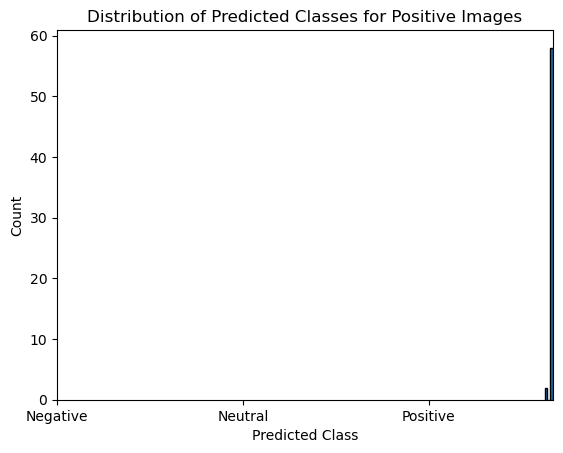

In [ ]:

# Plot the histogram
plt.hist(positive_predictions, bins=3, edgecolor='black')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks([0.2, 0.5, 0.8], ['Negative', 'Neutral', 'Positive'])  # Adjust the labels based on your classes
plt.title('Distribution of Predicted Classes for Positive Images')
plt.show()